<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/Train_DeepLearning_Network_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


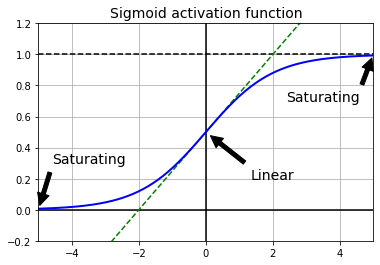

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))


z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [3]:
#초기화 방법들
keras.layers.Dense(10, activation='relu', kernel_initializer=keras.initializers.he_normal)
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='sigmoid', kernel_initializer=he_avg_init)

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [11]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale*elu(z, alpha)


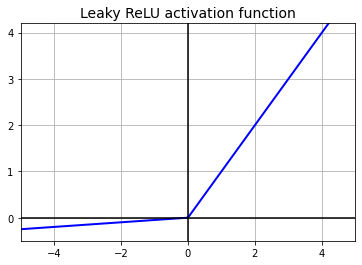

In [5]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

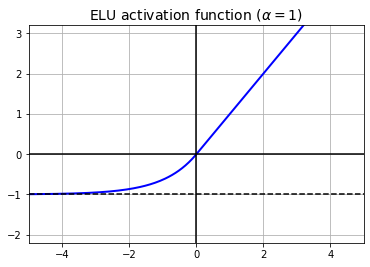

In [6]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

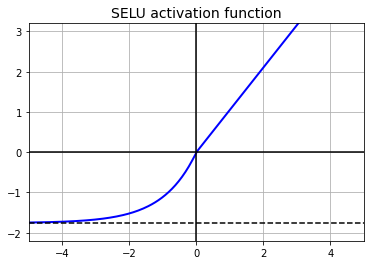

In [13]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [7]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_train[0].shape)

4431872/4422102 [==============================] - 0s 0us/step
(28, 28)


In [8]:
tf.random.set_seed(42)
np.random.seed(42)


#Leaky ReLU 사용
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3122 - accuracy: 0.6186 - val_loss: 0.9047 - val_accuracy: 0.7158
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8059 - accuracy: 0.7345 - val_loss: 0.7203 - val_accuracy: 0.7636
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6870 - accuracy: 0.7706 - val_loss: 0.6475 - val_accuracy: 0.7886
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6249 - accuracy: 0.7932 - val_loss: 0.5924 - val_accuracy: 0.8072
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5849 - accuracy: 0.8068 - val_loss: 0.5598 - val_accuracy: 0.8194
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5564 - accuracy: 0.8153 - val_loss: 0.5361 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5347 - accuracy: 0.8221 - val_loss: 0.5166 - val_accuracy:

In [19]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [14]:
#SELU 사용
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 16s 9ms/step - loss: 1.1910 - accuracy: 0.5451 - val_loss: 0.9506 - val_accuracy: 0.6612
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.8015 - accuracy: 0.7010 - val_loss: 0.6396 - val_accuracy: 0.7674
Epoch 3/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6866 - accuracy: 0.7467 - val_loss: 0.6090 - val_accuracy: 0.7552
Epoch 4/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5986 - accuracy: 0.7766 - val_loss: 1.1978 - val_accuracy: 0.6276
Epoch 5/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5831 - accuracy: 0.7824 - val_loss: 0.5278 - val_accuracy: 0.8094
Epoch 6/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5485 - accuracy: 0.8022 - val_loss: 0.5160 - val_accuracy: 0.8246
Epoch 7/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4945 - accuracy: 0.8231 - val_loss: 0.4837 - val_ac

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 18s 9ms/step - loss: 1.9807 - accuracy: 0.2162 - val_loss: 1.7354 - val_accuracy: 0.3332
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 1.3840 - accuracy: 0.4102 - val_loss: 1.0921 - val_accuracy: 0.5388
Epoch 3/20
1719/1719 [==============================] - 15s 9ms/step - loss: 1.0867 - accuracy: 0.5466 - val_loss: 0.9190 - val_accuracy: 0.6090
Epoch 4/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.8801 - accuracy: 0.6303 - val_loss: 0.7752 - val_accuracy: 0.6658
Epoch 5/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.7960 - accuracy: 0.6899 - val_loss: 0.7246 - val_accuracy: 0.7238
Epoch 6/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.8130 - accuracy: 0.7019 - val_loss: 0.6591 - val_accuracy: 0.7696
Epoch 7/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.8136 - accuracy: 0.7022 - val_loss: 1.5865 - val_ac

KeyboardInterrupt: ignored

In [28]:
#BatchNomalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_106 (Ba  (None, 784)              3136      
 tchNormalization)                                               
                                                                 
 dense_314 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_107 (Ba  (None, 300)              1200      
 tchNormalization)                                               
                                                                 
 dense_315 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_108 (Ba  (None, 100)             

In [30]:
#파라미터 확인하기, 784 * 4 = 3136
#non - trainable 1568 + 600 + 200 = 2368 -> 역전파로 훈련되지 않음... 데이터로 훈련됨
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_106/gamma:0', True),
 ('batch_normalization_106/beta:0', True),
 ('batch_normalization_106/moving_mean:0', False),
 ('batch_normalization_106/moving_variance:0', False)]

In [32]:
#배치 정규화 층에 이동 파라미터가 있으므로 편향 제거
#활성화 함수 이전에 배치 정규화 층 구성
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 1.0842 - accuracy: 0.6690 - val_loss: 0.6872 - val_accuracy: 0.7846
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6877 - accuracy: 0.7816 - val_loss: 0.5603 - val_accuracy: 0.8126
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6012 - accuracy: 0.8015 - val_loss: 0.5048 - val_accuracy: 0.8246
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5479 - accuracy: 0.8173 - val_loss: 0.4695 - val_accuracy: 0.8348
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5141 - accuracy: 0.8254 - val_loss: 0.4458 - val_accuracy: 0.8442
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4910 - accuracy: 0.8329 - val_loss: 0.4270 - val_accuracy: 0.8484
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4743 - accuracy: 0.8374 - val_loss: 0.4138 - val_accuracy:

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [35]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8919 - accuracy: 0.6978 - val_loss: 0.6097 - val_accuracy: 0.7926
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6132 - accuracy: 0.7895 - val_loss: 0.5217 - val_accuracy: 0.8194
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5539 - accuracy: 0.8095 - val_loss: 0.4852 - val_accuracy: 0.8360
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5203 - accuracy: 0.8213 - val_loss: 0.4602 - val_accuracy: 0.8436
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4961 - accuracy: 0.8296 - val_loss: 0.4446 - val_accuracy: 0.8494
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4804 - accuracy: 0.8339 - val_loss: 0.4311 - val_accuracy: 0.8526
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4678 - accuracy: 0.8382 - val_loss: 0.4201 - val_accuracy:

In [36]:
#전이 학습!

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

#샌달과 셔츠를 제외한 데이터셋 , 셔츠인지 샌달인지 나누는 데이터셋
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

#적은 데이터셋
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [39]:
#샌달 셔츠 제외한 분류기
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation=keras.activations.selu))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.h5")

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.6003 - accuracy: 0.8038 - val_loss: 0.4017 - val_accuracy: 0.8595
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3619 - accuracy: 0.8754 - val_loss: 0.3366 - val_accuracy: 0.8832
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3253 - accuracy: 0.8871 - val_loss: 0.3096 - val_accuracy: 0.8941
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3058 - accuracy: 0.8933 - val_loss: 0.2938 - val_accuracy: 0.9013
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2927 - accuracy: 0.8982 - val_loss: 0.2839 - val_accuracy: 0.9048
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2831 - accuracy: 0.9013 - val_loss: 0.2795 - val_accuracy: 0.9016
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2748 - accuracy: 0.9045 - val_loss: 0.2735 - val_accuracy:

In [41]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation=keras.activations.selu))
model_B.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model_B.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))


Epoch 1/20
7/7 [==============================] - 1s 36ms/step - loss: 0.7735 - accuracy: 0.6500 - val_loss: 0.6181 - val_accuracy: 0.6846
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 0.5475 - accuracy: 0.7600 - val_loss: 0.4561 - val_accuracy: 0.7972
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3977 - accuracy: 0.8350 - val_loss: 0.3580 - val_accuracy: 0.8661
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3070 - accuracy: 0.9100 - val_loss: 0.2942 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 30ms/step - loss: 0.2505 - accuracy: 0.9300 - val_loss: 0.2523 - val_accuracy: 0.9371
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2093 - accuracy: 0.9600 - val_loss: 0.2184 - val_accuracy: 0.9554
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1795 - accuracy: 0.9750 - val_loss: 0.1951 - val_accuracy: 0.9615
Epoch 8/20
7/7 [===========

In [43]:
#model A 를 그대로 사용하면 원본 모델 가중치가 변경이된다.
#클론해서 사용함

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))
model_B_on_A.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_338 (Dense)           (None, 300)               235500    
                                                                 
 dense_339 (Dense)           (None, 100)               30100     
                                                                 
 dense_340 (Dense)           (None, 50)                5050      
                                                                 
 dense_341 (Dense)           (None, 50)                2550      
                                                                 
 dense_342 (Dense)           (None, 50)                2550      
                                                                 
 dense_351 (Dense)           (None, 1)               

In [46]:
#레이어를 동결시킨다.
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=[X_valid_B, y_valid_B])

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-4),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 37ms/step - loss: 0.0581 - accuracy: 0.9950 - val_loss: 0.0866 - val_accuracy: 0.9858
Epoch 2/4
7/7 [==============================] - 0s 15ms/step - loss: 0.0576 - accuracy: 0.9950 - val_loss: 0.0860 - val_accuracy: 0.9858
Epoch 3/4
7/7 [==============================] - 0s 16ms/step - loss: 0.0571 - accuracy: 0.9950 - val_loss: 0.0855 - val_accuracy: 0.9858
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.0566 - accuracy: 0.9950 - val_loss: 0.0849 - val_accuracy: 0.9858
Epoch 1/16
7/7 [==============================] - 1s 36ms/step - loss: 0.0562 - accuracy: 0.9950 - val_loss: 0.0846 - val_accuracy: 0.9858
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.0559 - accuracy: 0.9950 - val_loss: 0.0844 - val_accuracy: 0.9858
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.0557 - accuracy: 0.9950 - val_loss: 0.0841 - val_accuracy: 0.9858
Epoch 4/16
7/7 [===============

In [47]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9920


[0.06734481453895569, 0.9919999837875366]